<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.910836,96.100536,22.378050,85.598967,-0.000333,260.988056,260.987742,0.000313
1,0.0,1.0,76.897939,34.354512,28.213926,80.822793,-0.003327,230.285843,230.288562,-0.002719
2,0.0,2.0,78.562277,99.474345,62.607538,46.463133,-0.000672,297.106622,297.107312,-0.000690
3,0.0,3.0,31.696278,85.496340,49.750450,98.671881,0.000402,275.615352,275.614333,0.001019
4,0.0,4.0,38.741915,85.881408,65.339479,38.365998,-0.000083,238.328718,238.328915,-0.000198
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.385415,48.849140,29.190276,65.178954,-0.003653,211.600133,211.603633,-0.003501
59996,999.0,56.0,59.020118,62.654812,75.128222,47.392432,0.000920,254.196504,254.195182,0.001323
59997,999.0,57.0,29.585568,47.690278,34.220922,58.862919,0.000599,180.360286,180.359530,0.000756
59998,999.0,58.0,99.106588,82.748130,65.955843,94.549103,-0.000154,352.359511,352.359638,-0.000127


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.910836,96.100536,22.378050,85.598967,-0.000333,260.988056,260.987742,0.000313
1,0.0,1.0,76.897939,34.354512,28.213926,80.822793,-0.003327,230.285843,230.288562,-0.002719
2,0.0,2.0,78.562277,99.474345,62.607538,46.463133,-0.000672,297.106622,297.107312,-0.000690
3,0.0,3.0,31.696278,85.496340,49.750450,98.671881,0.000402,275.615352,275.614333,0.001019
4,0.0,4.0,38.741915,85.881408,65.339479,38.365998,-0.000083,238.328718,238.328915,-0.000198
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.385415,48.849140,29.190276,65.178954,-0.003653,211.600133,211.603633,-0.003501
59996,999.0,56.0,59.020118,62.654812,75.128222,47.392432,0.000920,254.196504,254.195182,0.001323
59997,999.0,57.0,29.585568,47.690278,34.220922,58.862919,0.000599,180.360286,180.359530,0.000756
59998,999.0,58.0,99.106588,82.748130,65.955843,94.549103,-0.000154,352.359511,352.359638,-0.000127


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.910836,96.100536,22.378050,85.598967,-0.000333,260.988056,260.987742,0.000313
1,0.0,1.0,76.897939,34.354512,28.213926,80.822793,-0.003327,230.285843,230.288562,-0.002719
2,0.0,2.0,78.562277,99.474345,62.607538,46.463133,-0.000672,297.106622,297.107312,-0.000690
3,0.0,3.0,31.696278,85.496340,49.750450,98.671881,0.000402,275.615352,275.614333,0.001019
4,0.0,4.0,38.741915,85.881408,65.339479,38.365998,-0.000083,238.328718,238.328915,-0.000198
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.385415,48.849140,29.190276,65.178954,-0.003653,211.600133,211.603633,-0.003501
59996,999.0,56.0,59.020118,62.654812,75.128222,47.392432,0.000920,254.196504,254.195182,0.001323
59997,999.0,57.0,29.585568,47.690278,34.220922,58.862919,0.000599,180.360286,180.359530,0.000756
59998,999.0,58.0,99.106588,82.748130,65.955843,94.549103,-0.000154,352.359511,352.359638,-0.000127


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

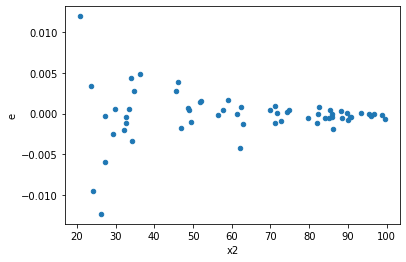

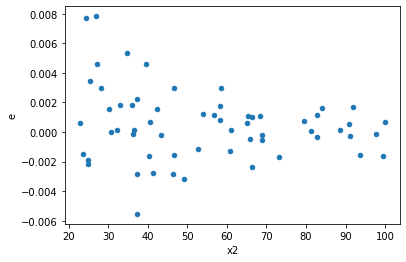

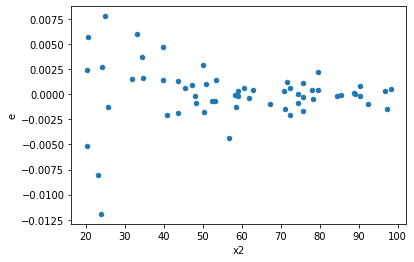

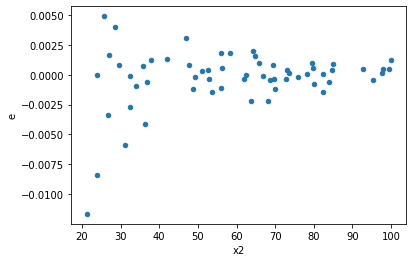

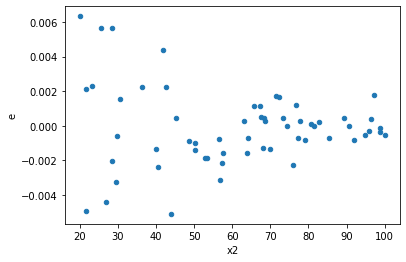

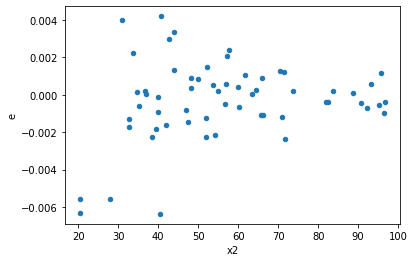

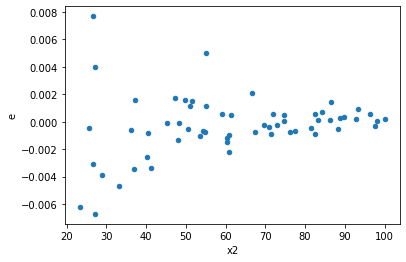

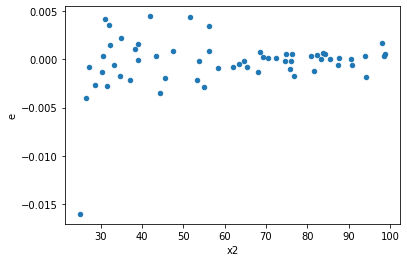

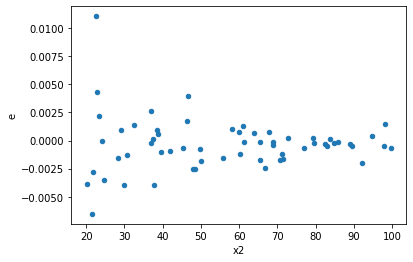

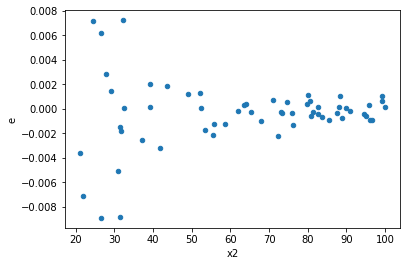

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.000482502729863408,6.042583713535743e-06,2.41251364931704e-05,3.021291856767872e-07,0.012523418707385018,1.3982842019297608e-14,Reject001=0 : Heteroscedasticity
1.0,20.0,20.0,0.0002041099915208742,2.7313131029985016e-05,1.020549957604371e-05,1.365656551499251e-06,0.13381574721780204,3.504137735127617e-05,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,0.0003845163921992696,1.2670179283502748e-05,1.922581960996348e-05,6.335089641751374e-07,0.032950947061150586,1.5472897774063422e-10,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,0.0002443613769825282,1.0521067047416904e-05,1.2218068849126411e-05,5.260533523708452e-07,0.04305535996455429,1.8814843185588535e-09,Reject001=0 : Heteroscedasticity
4.0,20.0,20.0,0.00022531269018484997,2.0643751678659182e-05,1.1265634509242499e-05,1.0321875839329591e-06,0.0916226762980937,1.5724771081409524e-06,Reject001=0 : Heteroscedasticity
5.0,20.0,20.0,0.0001462102101500276,1.7465340486089165e-05,7.310510507501381e-06,8.732670243044583e-07,0.11945363096166692,1.4166055287720399e-05,Reject001=0 : Heteroscedasticity
6.0,20.0,20.0,0.0001926200368840318,5.55682173645549e-06,9.63100184420159e-06,2.7784108682277453e-07,0.028848617341928,4.400457268996496e-11,Reject001=0 : Heteroscedasticity
7.0,20.0,20.0,0.0003351295703705436,1.4100647659505205e-05,1.6756478518527178e-05,7.050323829752603e-07,0.042075211817072744,1.5201731857449582e-09,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,0.00024073762098552028,1.4043172559173355e-05,1.2036881049276014e-05,7.021586279586677e-07,0.05833393427119567,3.013154530074654e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    998
Reject001=1 : Homoscedasticity        2
Name: Result_test, dtype: int64